<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11563 entries, 0 to 11562
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     11563 non-null  object 
 1   genre    11563 non-null  object 
 2   type     11563 non-null  object 
 3   rating   11563 non-null  float64
 4   members  11563 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 451.8+ KB
Coordenada:  [2.0063e+05 9.3700e+00] Label:  0
Coordenada:  [7.93665e+05 9.26000e+00] Label:  3
Coordenada:  [1.14262e+05 9.25000e+00] Label:  2
Coordenada:  [9.3351e+04 9.1500e+00] Label:  2
Coordenada:  [4.25855e+05 9.13000e+00] Label:  3
Coordenada:  [8.0679e+04 9.1100e+00] Label:  2
Coordenada:  [7.2534e+04 9.1000e+00] Label:  2
Coordenada:  [4.56749e+05 9.06000e+00] Label:  3
Coordenada:  [1.02733e+05 9.05000e+00] Label:  2
Coordenada:  [3.36376e+05 9.04000e+00] Label:  0
Coordenada:  [5.72888e+05 8.98000e+00] Label:  3
Coordenada:  [1.79342e+05 8.930

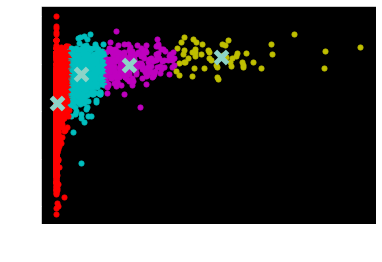

Cluster centroids: 

Cluster 0: 
hentai
fantasy
kids
adventure
drama
music
action
historical
supernatural
shounen
-------------
Cluster 1: 
comedy
life
slice
school
romance
shounen
ecchi
adventure
parody
kids
-------------
Cluster 2: 
sci
fi
mecha
action
adventure
shounen
space
comedy
drama
military
-------------


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

dataset=pd.read_csv('anime.csv', on_bad_lines='skip')

print(dataset)
print('------------')
print(dataset.key())

#CLUSTERING MEMBRES RATING
df=pd.DataFrame(dataset)
x=df['members'].values
y=df['rating'].values

X=np.array(list(zip(x,y)))

km=KMeans(n_clusters=4)
km.fit(X)
labels=km.predict(X)
centroids=km.cluster_centers_

colors=["m.","r.","c.","y.","b."]

for i in range(len(X)):
        print("Coordenada: ",X[i],"Label: ",labels[i])
        plt.plot(X[i][0],X[i][1],colors[labels[i]],markersize=10)
plt.ylabel('Rating')
plt.xlabel('Members')
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=150,linewidths=5,zorder=10)
plt.show()

vec_x = dataset['genre']

vectorizer = TfidfVectorizer(stop_words='english')
features_x = vectorizer.fit_transform(vec_x)

k=3
km=KMeans(n_clusters=k, init='k-means++',max_iter=100, n_init=1)
km.fit(features_x)

dataset['cluster']=km.labels_

dataset.head()

labels=km.predict(features_x)
centroids=km.cluster_centers_

colors=["m.","r.","c.","y.","b."]

print('Cluster centroids: \n')
order_centroids = km.cluster_centers_.argsort()[:,::-1]
terms=vectorizer.get_feature_names()

for i in range(k):
        print('Cluster %d: ' % i)
        for j in order_centroids[i, :10]:
                print('%s' % terms[j])
        print('-------------')


